In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import *



In [3]:
t = ascii.read("PSCompPars_2023.03.20_02.22.01.csv")

In [4]:
t.columns

<TableColumns names=('pl_name','hostname','sy_snum','sy_pnum','discoverymethod','disc_year','disc_facility','pl_controv_flag','pl_orbper','pl_orbpererr1','pl_orbpererr2','pl_orbperlim','pl_orbsmax','pl_orbsmaxerr1','pl_orbsmaxerr2','pl_orbsmaxlim','pl_rade','pl_radeerr1','pl_radeerr2','pl_radelim','pl_radj','pl_radjerr1','pl_radjerr2','pl_radjlim','pl_bmasse','pl_bmasseerr1','pl_bmasseerr2','pl_bmasselim','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_bmassjlim','pl_bmassprov','pl_orbeccen','pl_orbeccenerr1','pl_orbeccenerr2','pl_orbeccenlim','pl_insol','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqt','pl_eqterr1','pl_eqterr2','pl_eqtlim','ttv_flag','st_spectype','st_teff','st_tefferr1','st_tefferr2','st_tefflim','st_rad','st_raderr1','st_raderr2','st_radlim','st_mass','st_masserr1','st_masserr2','st_masslim','st_met','st_meterr1','st_meterr2','st_metlim','st_metratio','st_logg','st_loggerr1','st_loggerr2','st_logglim','rastr','ra','decstr','dec','sy_dist','sy_disterr1','sy_dister

In [46]:
P = t['pl_orbper']/365.25
sma = t['pl_orbsmax']
mj = t['pl_bmassj']
disc = t['discoverymethod']

In [20]:
unique_by_name = unique(t, keys='discoverymethod')

print(unique_by_name['discoverymethod'])

       discoverymethod       
-----------------------------
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations


Transit green .
Radial Velocity orange v
Imaging blue o


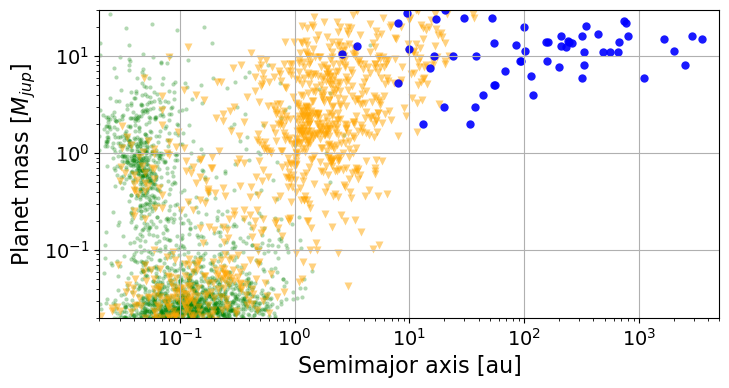

In [86]:
methods = ['Transit','Radial Velocity','Imaging']
meth_col = np.array(('green','orange','blue'))
meth_sym = ['.','v','o']
meth_zord = [-10,-5,-1]
meth_alf = [0.3,0.5,0.9]


fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.set_ylim(0.02,30)
ax.set_xlim(0.02,5000)
ax.set_xlabel('Semimajor axis [au]',fontsize=16)
ax.set_ylabel('Planet mass [$M_{jup}$]',fontsize=16)
ax.grid()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for (ma, mz, me, mc, ms) in zip(meth_alf, meth_zord,methods,meth_col,meth_sym):
    print(me,mc,ms)
    m = (t['discoverymethod'] == me)
    ax.loglog(sma[m],mj[m],
              marker=ms,
              mec='none',
              color=mc,
              linestyle='none',
              zorder=mz,
              alpha=ma)

plt.savefig('f3.pdf',bbox_inches='tight')
